In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

x1 = pd.read_csv('2y.csv')
x2 = pd.read_csv('5y.csv')
x3 = pd.read_csv('10y.csv')
x4 = pd.read_csv('spx.csv')
x5 = pd.read_csv('niki.csv')
x6 = pd.read_csv('gold.csv')
y = pd.read_csv('usd/jpy.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'spx.csv'

In [ ]:
x1.columns = ['d','2y']
del x1['d']
x2.columns = ['d', '5y']
del x2['d']
x3 = pd.read_csv('10y.csv')
x3.columns = ['date', '10y']
x4.columns = ['d', 'spx']
del x4['d']
x5.columns = ['d', 'niki']
del x5['d']
x6.columns = ['d', 'gold']
del x6['d']
y.columns = ['d', 'usd/jpy']
del y['d']
X = pd.concat([x1, x2, x4, x5, x6], axis=1)
dataset = pd.concat([y, X], axis=1)
df =pd.concat([dataset, x3], axis=1).set_index('date')
df = df[-300:]


In [ ]:
Y = np.log(df.loc[:, ('usd/jpy')])
Y.name = Y.name[-1]+'_pred'
X1 = np.log(df.loc[:, ('2y', '5y','spx', 'niki', 'gold', '10y')])
X = X1
dataset = pd.concat([Y, X], axis=1)
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [ ]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
10y,233.514110
5y,186.052096
gold,55.382927
niki,20.964696
spx,10.155238
2y,0.395149


In [ ]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
num_folds = 10
seed = (None)
scoring = 'neg_mean_squared_error' 
X_train_ARIMA=X_train.loc[:, ['2y', '5y', 'spx', 'niki', 'gold', '10y']]
X_test_ARIMA=X_test.loc[:, ['2y', '5y', 'spx', 'niki', 'gold', '10y']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)


NameError: name 'X' is not defined

In [ ]:
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)   

ARIMA(0, 0, 0) MSE=0.0000162
ARIMA(0, 0, 1) MSE=0.0000084
ARIMA(1, 0, 0) MSE=0.0000020
ARIMA(1, 0, 1) MSE=0.0000020
ARIMA(2, 0, 0) MSE=0.0000020
ARIMA(2, 0, 1) MSE=0.0000020
Best ARIMA(2, 0, 0) MSE=0.0000020


In [ ]:

modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,0])
model_fit = modelARIMA.fit()

In [ ]:
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

1.8529792258536842e-05


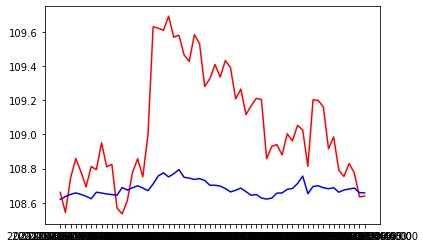

In [ ]:
#Use the following code to produce the comparison of actual vs. predicted
predicted_tuned.index = Y_test.index
df2 = pyplot.plot(np.exp(Y_test), 'r') # plotting t, a separately
df4 = pyplot.plot(np.exp(predicted_tuned), 'b')

pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()

df6 = np.exp(Y_test)
df7 = np.exp(predicted_tuned)
df8 = pd.concat([df6, df7], axis=1)

In [ ]:
pd.read_csv('dd/10y.csv')

,ds,10y
0,2021-01-21 14:45:00,1.1041
1,2021-01-21 18:45:00,1.1092
2,2021-01-21 22:45:00,1.1075
3,2021-01-22 02:45:00,1.1092
4,2021-01-22 06:45:00,1.0957
...,...,...
495,2021-05-20 14:45:00,1.6318
496,2021-05-20 18:45:00,1.6284
497,2021-05-20 22:45:00,1.6318
498,2021-05-21 02:45:00,1.6301
